In [1]:
print('bach')

bach


In [2]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


In [5]:
import math
import numpy as np

In [6]:
S0 = 100.
K = 105.
T = 1.0
r = 0.05
sigma = 0.2

In [7]:
I = 100000

In [8]:
np.random.seed(1000)

In [9]:
z = np.random.standard_normal(I)

In [10]:
ST = S0 * np.exp((r - sigma ** 2 / 2) * T + sigma * math.sqrt(T) * z)

In [11]:
hT = np.maximum(ST - K, 0)

In [12]:
C0 = math.exp(-r * T) * np.mean(hT)


In [13]:
print('Value of the European call option: {:5.3f}.'.format(C0))  

Value of the European call option: 8.019.


In [14]:
import numpy as np

In [15]:
import pandas as pd

In [16]:
from pylab import plt, mpl

In [18]:
plt.style.use('seaborn')

In [19]:
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [2]:
import pandas as pd

In [4]:
data = pd.read_csv('tr_eikon_eod_data.csv', index_col=0, parse_dates=True)

In [6]:
data = pd.DataFrame(data['.SPX'])

In [7]:
data.dropna(inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1972 entries, 2010-01-04 to 2017-10-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   .SPX    1972 non-null   float64
dtypes: float64(1)
memory usage: 30.8 KB


In [10]:
import numpy as np

In [11]:
data['rets'] = np.log(data / data.shift(1))

In [12]:
data['vola'] = data['rets'].rolling(252).std() * np.sqrt(252)

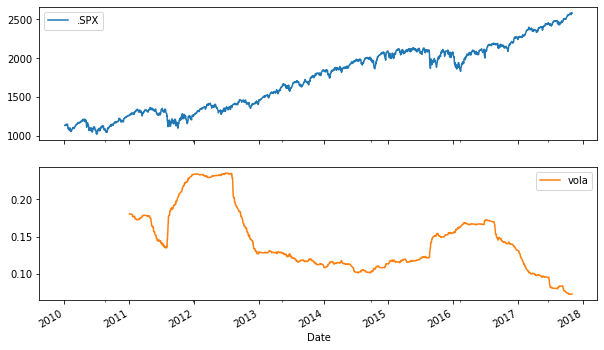

In [13]:
data[['.SPX', 'vola']].plot(subplots=True, figsize=(10, 6));

In [1]:
import math

In [10]:
import math
loops = 250000
a = range(1, loops)
print(2**3)
def f(x):
    return 3*math.log(x) + math.cos(x)**2
%timeit r = [f(x) for x in a]

8
108 ms ± 2.86 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
import numpy as np
a = np.arange(1, loops)
print(a)

[     1      2      3 ... 249997 249998 249999]


In [12]:
import eikon as ek
data = ek.get_timeseries('AAPL.O', fields='*', start_date='2018-10-18 16:00:00', end_date='2018-10-18 17:00:00', interval='tick')
data.info()

ModuleNotFoundError: No module named 'eikon'

In [2]:
import pandas as pd
import pandas_datareader.data as pdr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [3]:
end = datetime.today()


In [4]:
end

datetime.datetime(2020, 7, 19, 9, 31, 17, 822308)

In [5]:
start = datetime(end.year-5,end.month,end.day)

In [6]:
BTC = pdr.DataReader('BTC-USD','yahoo',start,end)

In [7]:
BTC

High          Low         Open        Close        Volume  \
Date                                                                           
2015-07-17   282.527008   274.075012   279.330994   274.901001  2.518710e+07   
2015-07-18   275.670013   272.513000   274.766998   273.614014  1.533250e+07   
2015-07-19   278.980988   272.959991   273.498993   278.980988  2.271140e+07   
2015-07-20   280.546997   275.419006   278.881989   275.833008  2.293070e+07   
2015-07-21   277.665985   274.381012   275.657013   277.221985  1.938980e+07   
...                 ...          ...          ...          ...           ...   
2020-07-13  9283.841797  9171.661133  9238.703125  9243.213867  1.808504e+10   
2020-07-14  9275.325195  9171.933594  9241.897461  9192.836914  1.584473e+10   
2020-07-15  9214.312500  9088.947266  9191.980469  9132.227539  1.571397e+10   
2020-07-16  9182.253906  9089.202148  9131.812500  9151.392578  1.394457e+10   
2020-07-19  9161.302734  9149.075195  9157.375000  9152.096680  1.211900e+10   

              Adj Close  
Date                     
2015-07-17   274.901001  
2015-07-18   273.614014  
2015-07-19   278.980988  
2015-07-20   275.833008  
2015-07-21   277.221985  
...                 ...  
2020-07-13  9243.213867  
2020-07-14  9192.836914  
2020-07-15  9132.227539  
2020-07-16  9151.392578  
2020-07-19  9152.096680  

[1828 rows x 6 columns]

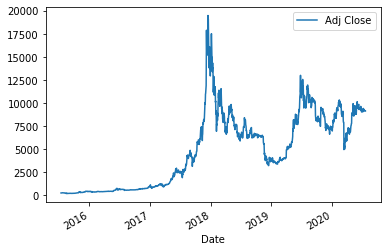

In [8]:
BTC['Adj Close'].plot(legend = True)

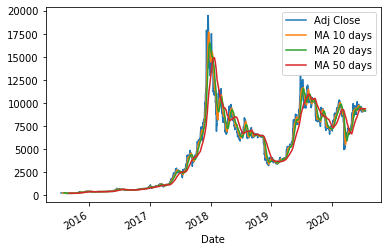

In [17]:
ma_days = [10,20,50]
for MA in ma_days:
 column_name = 'MA %s days'%(str(MA))
 BTC[column_name] = BTC['Adj Close'].rolling(window=MA,center=False).mean()
BTC[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True)